In [9]:
os.chdir(r"C:\Users\conso\Desktop\Python")
import pandas as pd
import numpy as np


In [10]:
players=pd.read_csv("archive\players_22.csv")

C:\Users\conso\AppData\Local\Temp\ipykernel_24748\4153435459.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players=pd.read_csv("archive\players_22.csv")


In [11]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [13]:
features=["overall", "potential", "wage_eur", "value_eur", "age"]

In [14]:
players=players.dropna(subset=features)

In [15]:
data=players[features].copy()

In [16]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


1. Scale the data
2. Initialize random centroids
3. Label each data point
4. Update centroids
5. Repeat steps 3 and 4 until centroids stop changing

In [19]:
data=(data-data.min())/(data.max()-data.min())*9+1

In [22]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [23]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [28]:
def random_centroids(data, k):
    centroids=[]
    for i in range(k):
        centroid=data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [29]:
centroids=random_centroids(data, 5)

C:\Users\conso\AppData\Local\Temp\ipykernel_24748\2489832108.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid=data.apply(lambda x: float(x.sample()))


In [30]:
centroids

,0,1,2,3,4
overall,4.717391,3.934783,7.065217,3.739130,5.304348
potential,4.717391,5.500000,5.695652,8.043478,4.717391
wage_eur,1.811159,1.115880,1.038627,1.193133,1.450644
value_eur,1.032058,1.026259,1.064534,1.092370,1.009789
age,4.666667,5.666667,2.000000,5.666667,6.000000


In [34]:
def get_labels(data, centroids):
    distances=centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [35]:
labels=get_labels(data, centroids)

In [36]:
labels.value_counts()

0    11053
4     4935
2     3124
1       47
3        6
Name: count, dtype: int64

In [41]:
#geometric mean to find the centroid of each cluster
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [43]:
def plot_clusters(data, labels, centroids, iteration):
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(data)
    centroids_2d=pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

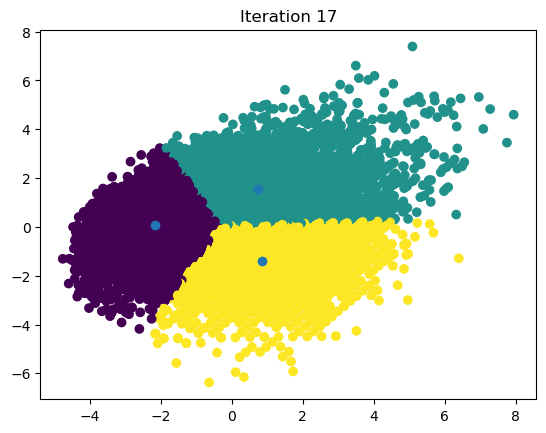

In [58]:
max_iterations=100
k=3

centroids= random_centroids(data, k)
old_centroids=pd.DataFrame()
iteration=1

while iteration<max_iterations and not centroids.equals(old_centroids):
    old_centroids=centroids
    
    labels=get_labels(data, centroids)
    centroids=new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration+=1

In [60]:
players[labels==2][["short_name"]+ features]

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


In [59]:
centroids

,0,1,2
overall,3.205672,5.807503,4.781960
potential,4.930905,6.497870,4.506813
wage_eur,1.028564,1.420500,1.118498
value_eur,1.026655,1.285685,1.044909
age,2.514741,3.598215,5.467648


In [61]:
from sklearn.cluster import KMeans

In [69]:
kmeans=KMeans(3)
kmeans.fit(data)

C:\Users\conso\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [71]:
centroids=kmeans.cluster_centers_
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,3.595326,6.226755,4.800928
potential,5.204935,6.620945,4.504955
wage_eur,1.039756,1.655091,1.112957
value_eur,1.035670,1.412572,1.040043
age,2.708687,4.137544,5.606489
